HEARTCHAIN

In [41]:
import pandas as pd
import numpy as np
from statistics import mode
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from scipy.sparse import data
import seaborn as sns
import matplotlib.pyplot as plt

Lectura de archivo

In [42]:
#Leemos el csv con metodos de pandas
data_df = pd.read_csv('C:/Users/Juanp/OneDrive/Documentos/ECG_AHORA_SI/MIT-BIH Arrhythmia Database.csv/MIT-BIH Arrhythmia Database.csv')
data_df

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100684,234,N,240,241.0,-0.110230,1.420339,1.403346,1.403346,-0.115682,14,...,-0.069234,5,6,20,9,-0.069234,-0.068378,-0.065373,-0.060779,-0.054383
100685,234,N,241,243.0,-0.119014,1.424782,1.420328,1.420328,-0.134406,13,...,-0.069530,7,5,20,8,-0.069530,-0.069290,-0.066317,-0.053437,-0.045120
100686,234,N,243,252.0,0.173524,-0.443214,1.436878,-0.714642,-0.136431,38,...,-0.089396,9,7,24,8,-0.089396,-0.088155,-0.078611,-0.066763,-0.058650
100687,234,N,252,244.0,-0.119820,-0.401522,1.337051,-0.688560,-0.125076,27,...,-0.065487,3,1,12,8,-0.065487,-0.065487,-0.064941,-0.064941,-0.061120


ANALISIS EXPLORATORIO DE DATOS

In [43]:
data_df.shape

(100689, 34)

In [44]:
data_df['type'].unique()

array(['N', 'Q', 'SVEB', 'VEB', 'F'], dtype=object)

In [45]:
data_df['type'].value_counts()

type
N       90083
VEB      7009
SVEB     2779
F         803
Q          15
Name: count, dtype: int64

TRANSFORMACION DE LA COLUMNA TYPE

In [46]:
mappeo = {'N':0, 'Q':1, 'SVEB':1, 'VEB':1, 'F':1}
data_df['type'] = data_df['type'].map(mappeo)
data_df['type'].value_counts()

type
0    90083
1    10606
Name: count, dtype: int64

In [47]:
sanos = data_df[data_df['type'] == 0]
arritmia = data_df[data_df['type'] != 0]

DISPERSION DE DATOS DE LOS PACIENTES SANOS

Promedio de la onda P en pacientes sanos: 0.03544915708538148
Mediana de la onda P en pacientes sanos: 0.008119242114158


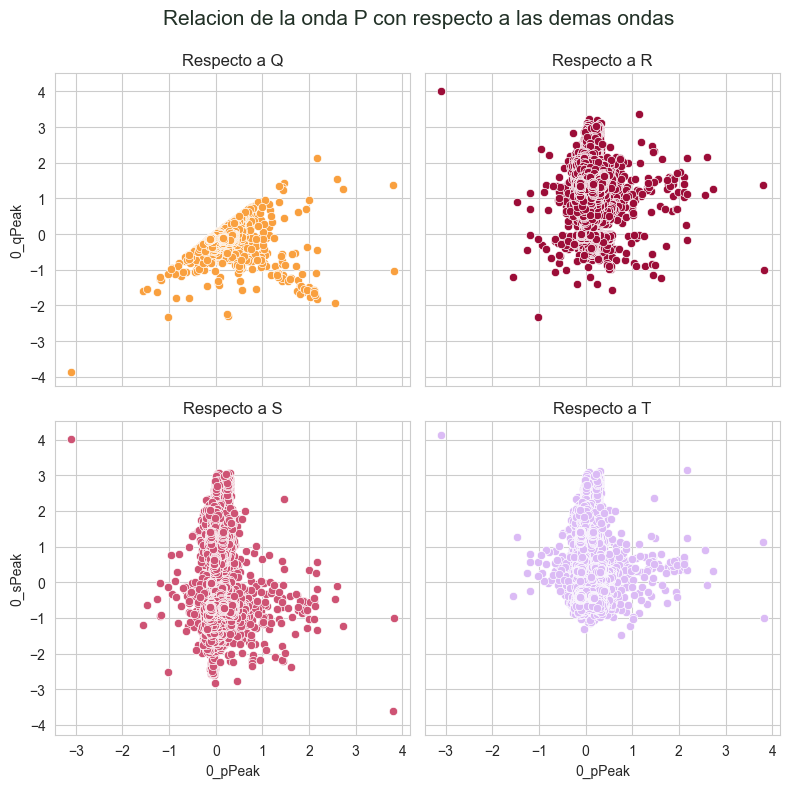

In [48]:
sns.set_style('whitegrid')
palette = ["#223127","#9c0d38","#ce5374","#dbbbf5","#F9A03F"]

fig = plt.figure(figsize=(8, 8))
axes = fig.subplots(2, 2, sharex=True, sharey=True)

ap = sns.scatterplot(x =sanos['0_pPeak'], y = sanos['0_qPeak'], ax=axes[0, 0], color=palette[4])
bp = sns.scatterplot(x = sanos['0_pPeak'], y = sanos['0_rPeak'], ax=axes[0, 1], color=palette[1])
cp = sns.scatterplot(x =sanos['0_pPeak'], y = sanos['0_sPeak'], ax=axes[1, 0], color=palette[2])
dp = sns.scatterplot(x = sanos['0_pPeak'], y = sanos['0_tPeak'], ax=axes[1, 1], color=palette[3]);

axes[0, 0].set_title('Respecto a Q')
axes[0, 1].set_title('Respecto a R')
axes[1, 0].set_title('Respecto a S')
axes[1, 1].set_title('Respecto a T')

fig.suptitle('Relacion de la onda P con respecto a las demas ondas', fontsize=15, c=palette[0], x=0.53)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
prom = sanos['0_pPeak'].mean()
mediana = sanos['0_pPeak'].median()
print(f'Promedio de la onda P en pacientes sanos: {prom}')
print(f'Mediana de la onda P en pacientes sanos: {mediana}')
maximo = sanos['0_pPeak'].max()


DISPERSION DE DATOS DE LOS PACIENTES ARRITMICOS

Promedio de la onda P en pacientes arritmicos: 0.17142404273414
Mediana de la onda P en pacientes arritmicos: 0.10482436223621949


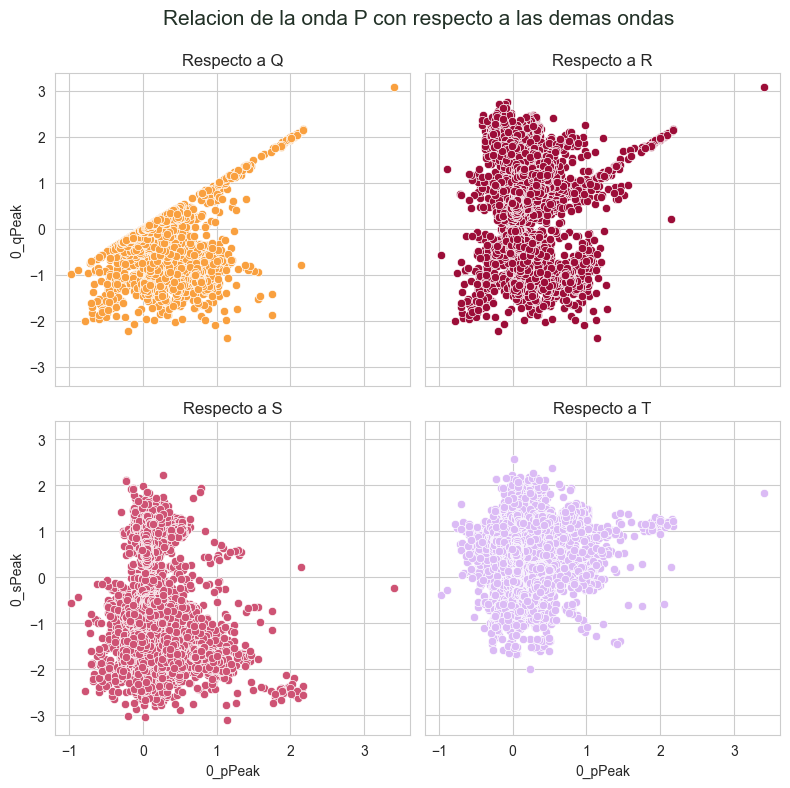

In [49]:
sns.set_style('whitegrid')
palette = ["#223127","#9c0d38","#ce5374","#dbbbf5","#F9A03F"]

fig = plt.figure(figsize=(8, 8))
axes = fig.subplots(2, 2, sharex=True, sharey=True)

sns.scatterplot(x =arritmia['0_pPeak'], y = arritmia['0_qPeak'], ax=axes[0, 0], color=palette[4])
sns.scatterplot(x = arritmia['0_pPeak'], y = arritmia['0_rPeak'], ax=axes[0, 1], color=palette[1])
sns.scatterplot(x =arritmia['0_pPeak'], y = arritmia['0_sPeak'], ax=axes[1, 0], color=palette[2])
sns.scatterplot(x = arritmia['0_pPeak'], y = arritmia['0_tPeak'], ax=axes[1, 1], color=palette[3]);


axes[0, 0].set_title('Respecto a Q')
axes[0, 1].set_title('Respecto a R')
axes[1, 0].set_title('Respecto a S')
axes[1, 1].set_title('Respecto a T')

fig.suptitle('Relacion de la onda P con respecto a las demas ondas', fontsize=15, c=palette[0], x=0.53)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
prom = arritmia['0_pPeak'].mean()
mediana = arritmia['0_pPeak'].median()
print(f'Promedio de la onda P en pacientes arritmicos: {prom}')
print(f'Mediana de la onda P en pacientes arritmicos: {mediana}')

MAPA DE CALOR PARA ENCONTRAR LAS CORRELACIONES MAS FUERTES

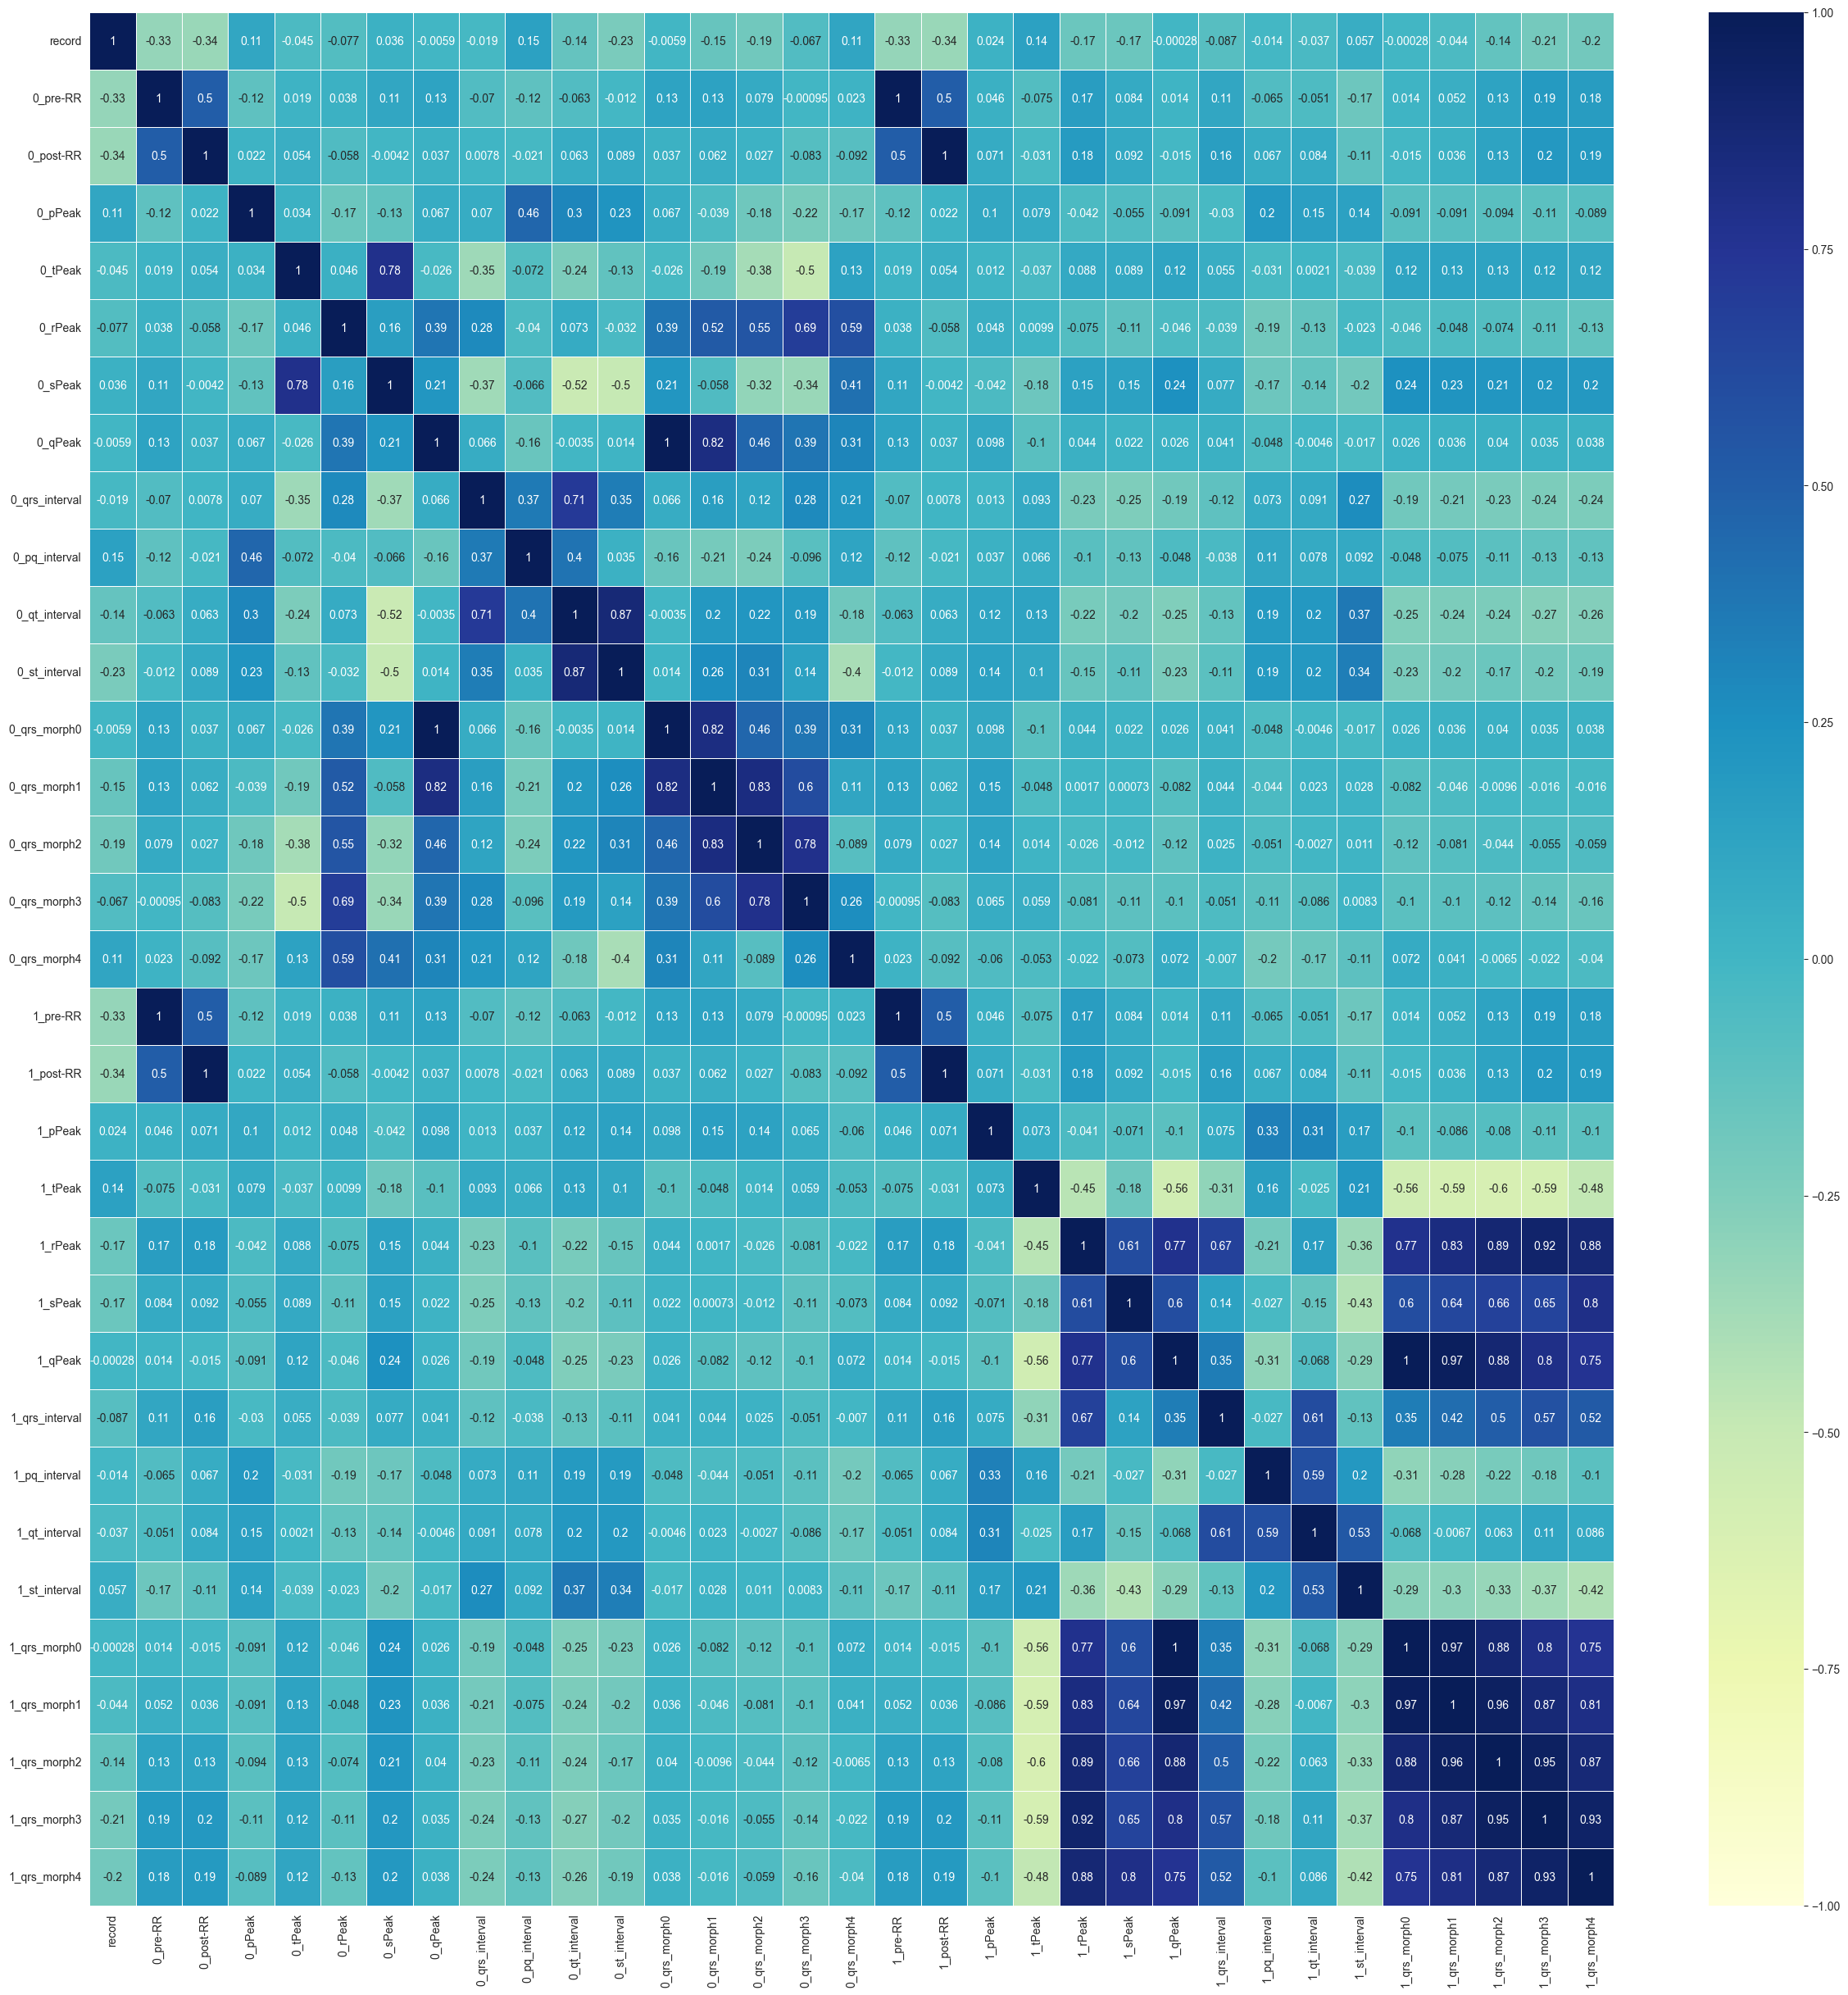

In [50]:
drop = data_df.drop(columns = ['type'])
drop_corr = drop.corr()
plt.figure(figsize = (30,30))
ax = sns.heatmap(drop_corr, vmin = -1, vmax = 1, annot = True, cmap='YlGnBu', linewidths = .5)

ASIGNACION DE VARIABLE X Y Y

In [40]:
x_data = data_df.drop(columns = ['record', 'type'])
y_label = data_df[['type']]
x_data

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,18,66,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,4,33,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,3,32,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,4,33,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,4,16,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100684,240,241.0,-0.110230,1.420339,1.403346,1.403346,-0.115682,14,3,18,...,-0.069234,5,6,20,9,-0.069234,-0.068378,-0.065373,-0.060779,-0.054383
100685,241,243.0,-0.119014,1.424782,1.420328,1.420328,-0.134406,13,5,19,...,-0.069530,7,5,20,8,-0.069530,-0.069290,-0.066317,-0.053437,-0.045120
100686,243,252.0,0.173524,-0.443214,1.436878,-0.714642,-0.136431,38,21,67,...,-0.089396,9,7,24,8,-0.089396,-0.088155,-0.078611,-0.066763,-0.058650
100687,252,244.0,-0.119820,-0.401522,1.337051,-0.688560,-0.125076,27,5,40,...,-0.065487,3,1,12,8,-0.065487,-0.065487,-0.064941,-0.064941,-0.061120


In [51]:
y_label.replace(1, 'Arritmia', inplace=True)
y_label.replace(0, 'Sano', inplace=True)

C:\Users\Juanp\AppData\Local\Temp\ipykernel_19220\525839860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_label.replace(1, 'Arritmia', inplace=True)
C:\Users\Juanp\AppData\Local\Temp\ipykernel_19220\525839860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_label.replace(0, 'Sano', inplace=True)


ENTRENAMIENTO Y PRUEBA

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_label, random_state=101)

NORMALIZACION DE DATOS

In [53]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

MODELO ENTRENADO

In [56]:
model = RandomForestClassifier(random_state=101, n_estimators=150)
model.fit(X_train_scaled, y_train)

# training accuracy
print(f'Exactitud de datode de entrenamiento: {model.score(X_train_scaled, y_train)}')

c:\Users\Juanp\OneDrive\Documentos\tutorial\env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Exactitud de datode de entrenamiento: 1.0


MATRIZ DE CONFUSION

In [58]:
y_pred = model.predict(X_test_scaled)
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))

print('Matrix de confusion')
print(metrics.confusion_matrix(y_test, y_pred)) 

Exactitud: 0.9901084495292576
Matrix de confusion
[[ 2389   192]
 [   57 22535]]


PREDICCIONES EN BASE AL INDICE DEL DATASET

In [59]:
carac = x_data[x_data.index == 5]

y_predict_test=model.predict(carac)
print(f'El paciente esta clasificado como: {y_predict_test}')


El paciente esta clasificado como: ['Sano']


c:\Users\Juanp\OneDrive\Documentos\tutorial\env\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
